# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Import the data

Add a shortcut to your google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data = data.sample(frac=0.2, random_state=42)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0
131631,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0
125326,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0
111256,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0
83590,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0


In [ ]:
data.shape

(31914, 8)

In [ ]:
print(data.isna().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [ ]:
for column in  data.columns[2:]:
  print(f"{column}: {data[column].value_counts()[1]}\n")

toxic: 3056

severe_toxic: 321

obscene: 1715

threat: 74

insult: 1614

identity_hate: 294



# Study the dataset

In [ ]:
# Your Code
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,31914.000000,31914.000000,31914.000000,31914.000000,31914.000000,31914.000000
mean,0.095757,0.010058,0.053738,0.002319,0.050573,0.009212
std,0.294263,0.099787,0.225504,0.048098,0.219128,0.095539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Prepare the data

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Your Code
import re

def clean_text(text):
  text = re.sub(r'<.*?>', '', text) #Remove Tags
  text = re.sub(r'[^a-zA-Z\s]', '', text) #Remove Non alphabetical characters
  text = re.sub(r'\n\n', '', text) #Remove double new lines
  text = re.sub(r'\n', '', text) #Remove single new line
  text = text.lower().strip() #Remove empty spaces and make it lowercase
  text = ' '.join([word for word in text.split() if word not in stop_words]) #Remove stopwords

  return text

data['comment_text'] = data['comment_text'].apply(clean_text)
print(data['comment_text'])

119105    geez forgetful weve already discussed marx ana...
131631    carioca rfa thanks support request adminshipth...
125326                   birthday worries enjoy ur daytalke
111256    pseudoscience category im assuming article pse...
83590     phrase exists would provided search engine eve...
                                ...                        
156920    also noticed simultaneously went articles fren...
121162                   would claim part ignorant majority
34019             lyrics found german version assume usable
83938     encyclopedia titanica references source origin...
78687                        silly fat cow wont leave alone
Name: comment_text, Length: 31914, dtype: object


In [ ]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer =  Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['comment_text'])
sequences = tokenizer.texts_to_sequences(data['comment_text'])
padded_sequences = pad_sequences(sequences, maxlen=200)

In [ ]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = data.iloc[:, 2:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compile the model

In [ ]:
# Your Code
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout

model = tf.keras.Sequential()
model.add(Embedding(10000, 16, input_length=200))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(24, activation="relu"))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['precision','accuracy','recall'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Train and test the model

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.7464 - loss: 0.1960 - precision: 0.0097 - recall: 7.8410e-04 - val_accuracy: 0.9890 - val_loss: 0.1093 - val_precision: 0.5794 - val_recall: 0.1742
Epoch 2/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9583 - loss: 0.1036 - precision: 0.6498 - recall: 0.3973 - val_accuracy: 0.9900 - val_loss: 0.0778 - val_precision: 0.7720 - val_recall: 0.4730
Epoch 3/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9881 - loss: 0.0617 - precision: 0.7737 - recall: 0.6209 - val_accuracy: 0.9900 - val_loss: 0.0714 - val_precision: 0.7781 - val_recall: 0.5455
Epoch 4/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9797 - loss: 0.0516 - precision: 0.8122 - recall: 0.6815 - val_accuracy: 0.9898 - val_loss: 0.0729 - val_precision: 0.7994 - val_recall: 0.5075
Epoch 5/10
639/639 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9814 - loss: 0.0487 - precision: 0.8201 - recall: 0.6992 - val_accuracy: 0.9900 

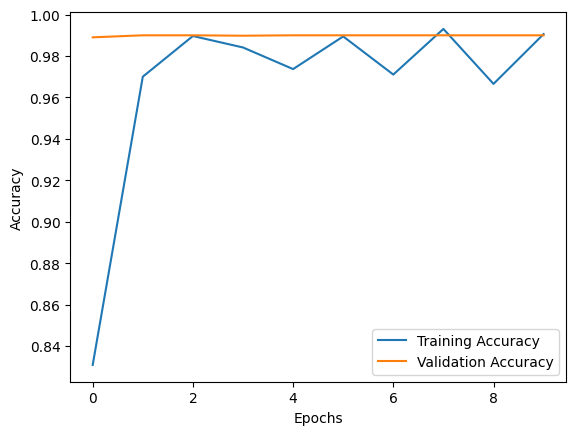

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

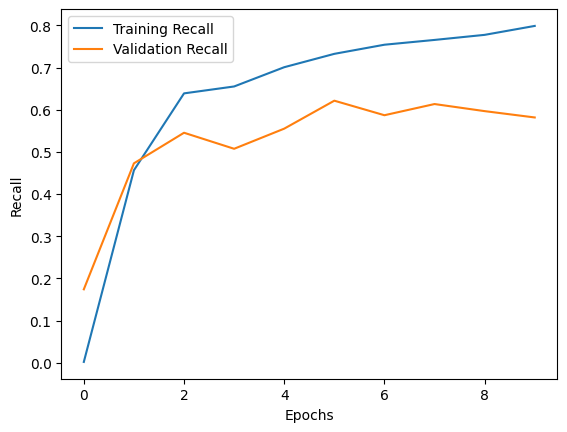

In [ ]:
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

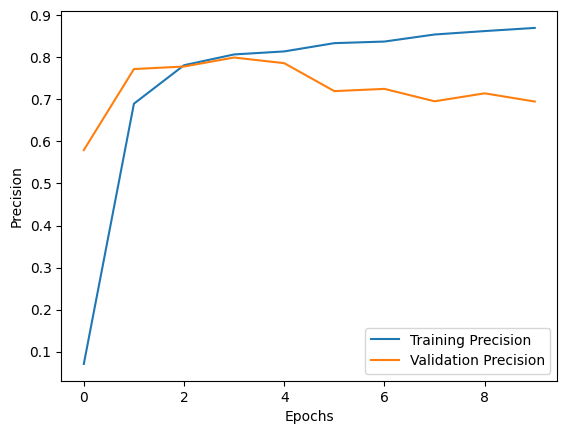

In [ ]:
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
def predict_toxicity(comment, tokenizer, model, max_length=200):
    cleaned_comment = clean_text(comment)
    sequence = tokenizer.texts_to_sequences([cleaned_comment])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    prediction = model.predict(padded_sequence)[0]
    category_names = data.columns[2:].tolist()
    results = {category: round(float(pred)) for category, pred in zip(category_names, prediction)}

    return results

In [ ]:
import tensorflow as tf
from tensorflow.math import confusion_matrix

predictions = model.predict(X_test)

y_true_binary = (y_test.sum(axis=1) > 0).astype(np.int32) #Make the expected values true if any of the classes is 1 and convert to numpy array

predictions_binary = (predictions > 0.5).astype(np.int32) #Get the predicted classes that are > 0.5

y_pred_binary = (predictions_binary.sum(axis=1) > 0).astype(np.int32) #Make the predictions also true if any of the classes is >0.5 and convert to numpy array

cm = confusion_matrix(y_true_binary, y_pred_binary) #Make the confusion matrix
print("Confusion Matrix (rows: true labels, columns: predicted labels):")
print(cm)

200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Confusion Matrix (rows: true labels, columns: predicted labels):
tf.Tensor(
[[5601  165]
 [ 198  419]], shape=(2, 2), dtype=int32)


In [ ]:
comments = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/test.csv')
comments = comments['comment_text']
comments.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [ ]:
comments_list = comments.to_list()
# Test each comment
for comment in comments_list[:10]:
    print("-------------------------------------------------------------------------------------------------")
    comment = clean_text(comment)
    print(f"Comment: {comment}")
    results = predict_toxicity(comment, tokenizer, model)

    toxic_predictions = [category for category, score in results.items() if score > 0.5]

    if toxic_predictions:
        print(f"Prediction(s): {', '.join(toxic_predictions)}")
    else:
        print("Prediction: Not Toxic")

-------------------------------------------------------------------------------------------------
Comment: yo bitch ja rule succesful youll ever whats hating sad mofuckasi bitch slap ur pethedic white faces get kiss ass guys sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother toofuckin white boys get things right next time
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prediction(s): toxic, obscene, insult
-------------------------------------------------------------------------------------------------
Comment: rfc title fine imo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Not Toxic
-------------------------------------------------------------------------------------------------
Comment: sources zawe ashton lapland
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: Not Toxic
-------------------------------------------------------------------------------------------------
Comment: look back source information updated correct form guess source hadnt updated 

In [ ]:
print(predict_toxicity("you are stupid", tokenizer, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
{'toxic': 1, 'severe_toxic': 0, 'obscene': 1, 'threat': 0, 'insult': 1, 'identity_hate': 0}
